In [26]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from skimage import morphology
import os

In [37]:
root = "Z:/Projectline_modelling_lung_cancer/Nii_Processed/"
Px = "1007504/"

#aveImages = "5_4d_thorax_20__20__i30f__3__average_ct_PlanCT_CTProcessed.nii.gz"
aveImages = "4_4dthorax_rctp01_20__i30s__3__average_ct___imar___imar_PlanCT_CTProcessed.nii.gz"

#aveLungImg = "5_4d_thorax_20__20__i30f__3__average_ct_PlanCT_LungProcessed.nii.gz"
aveLungImg = "4_4dthorax_rctp01_20__i30s__3__average_ct___imar___imar_PlanCT_LungProcessed.nii.gz"

itv = "ITV_GTProcessed.nii.gz"
gtv = "ITV_GTProcessed.nii.gz"

In [38]:
ct_np  = nib.load(os.path.join(root,Px,aveImages)).get_fdata()
lung_np  = nib.load(os.path.join(root,Px,aveLungImg)).get_fdata()
itv_np  = nib.load(os.path.join(root,Px,itv)).get_fdata()

ct_np.shape,lung_np.shape,itv_np.shape

((256, 320, 256), (256, 320, 256), (256, 320, 256))

In [39]:
itv_np[itv_np>0] = 1
lung_np[lung_np>0] = 1

itv_bool = morphology.binary_closing(itv_np.astype(bool))
itv_filled = itv_bool.astype(np.uint8)

lung_bool = morphology.binary_closing(lung_np.astype(bool))
lung_filled = lung_bool.astype(np.uint8)



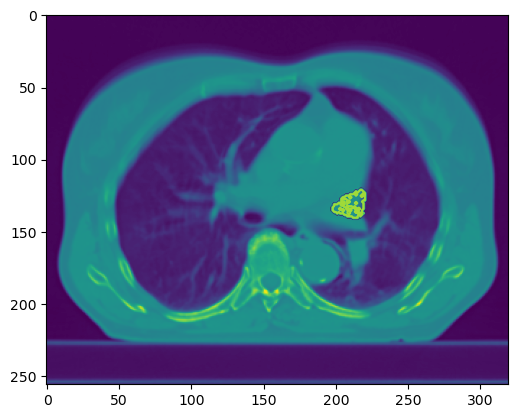

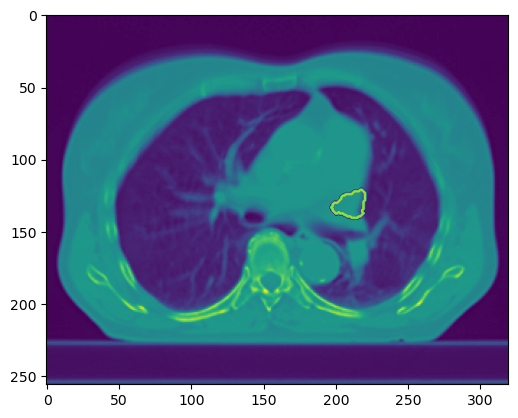

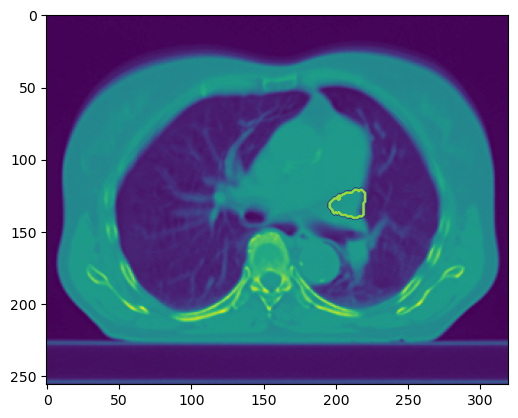

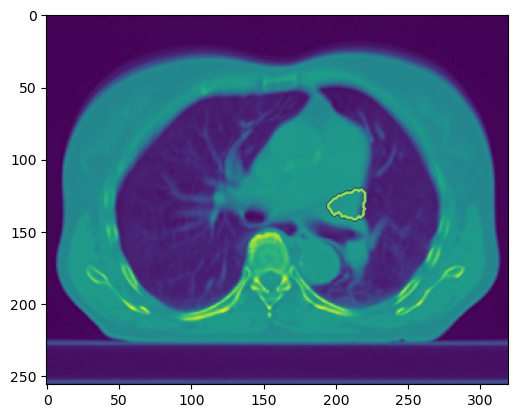

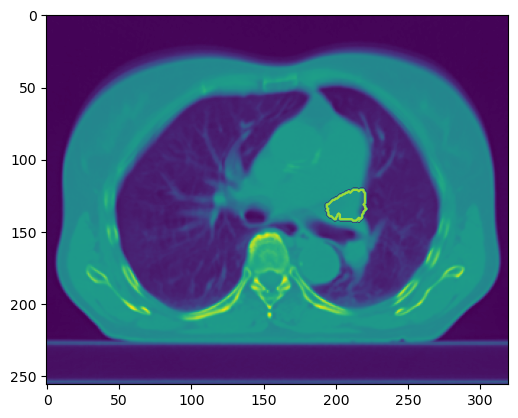

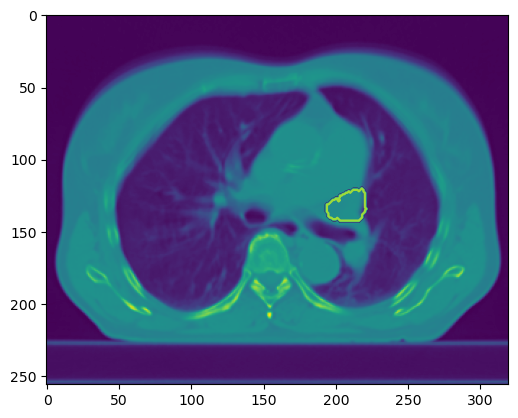

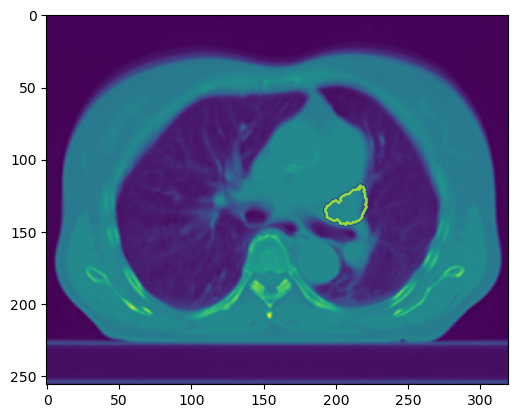

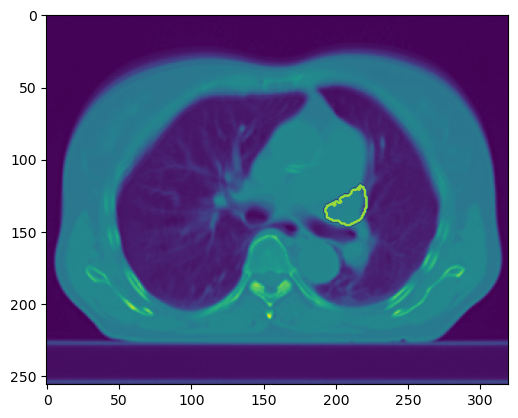

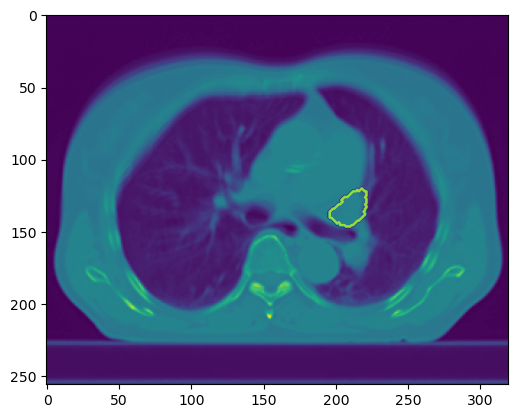

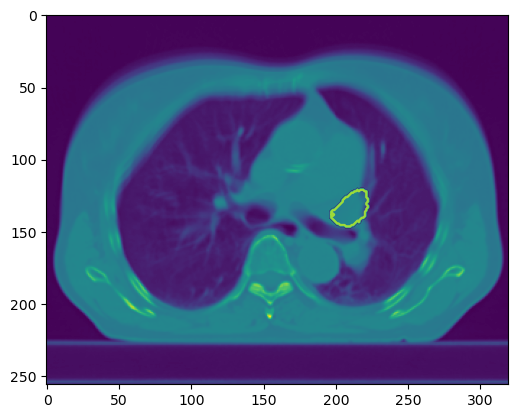

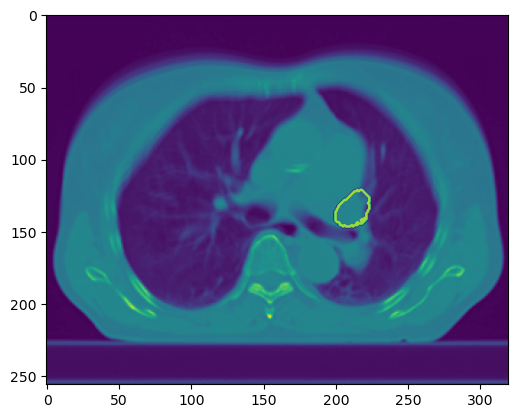

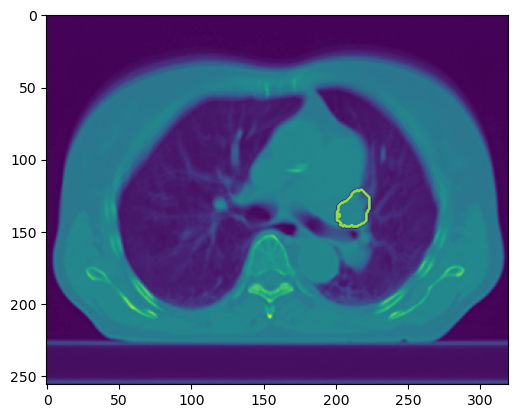

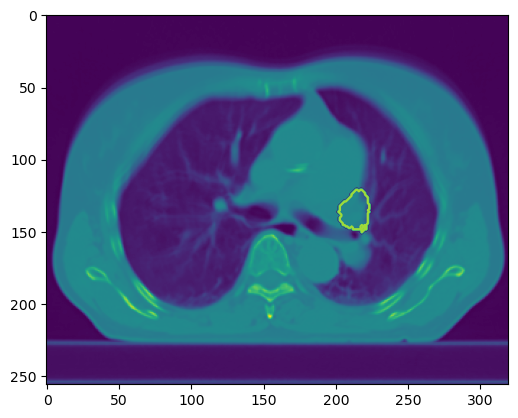

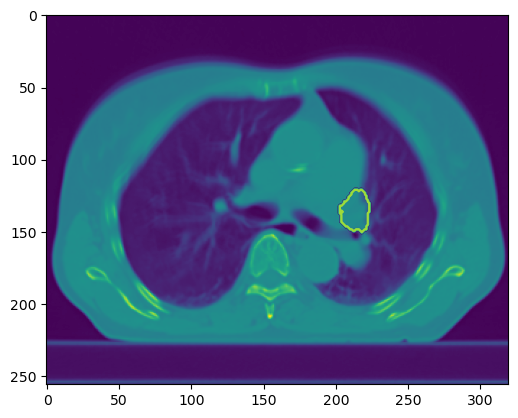

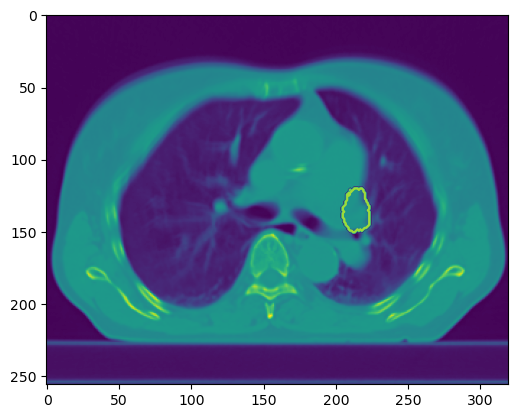

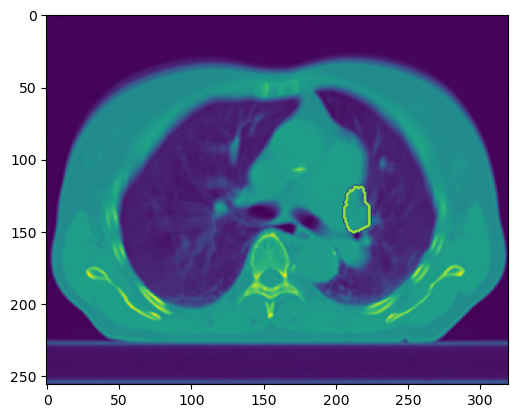

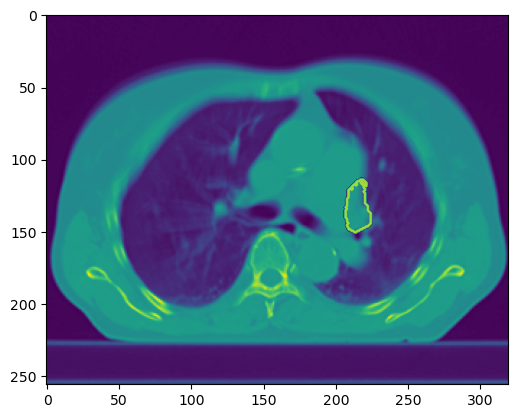

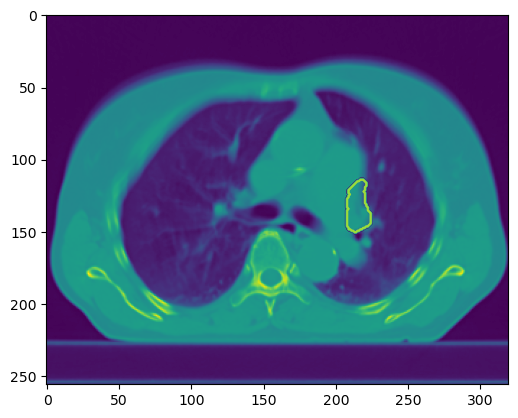

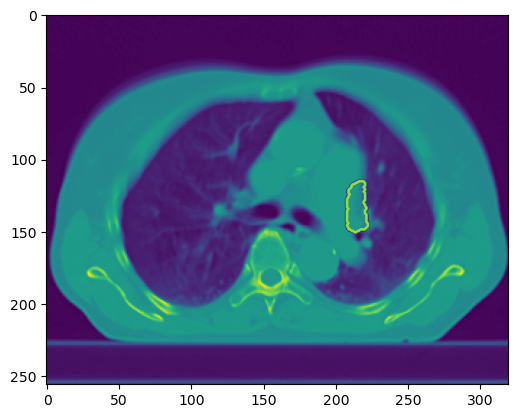

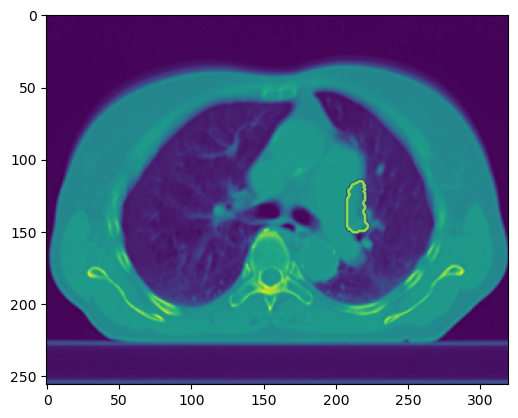

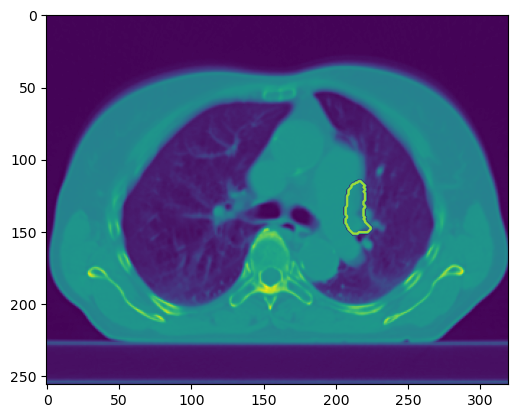

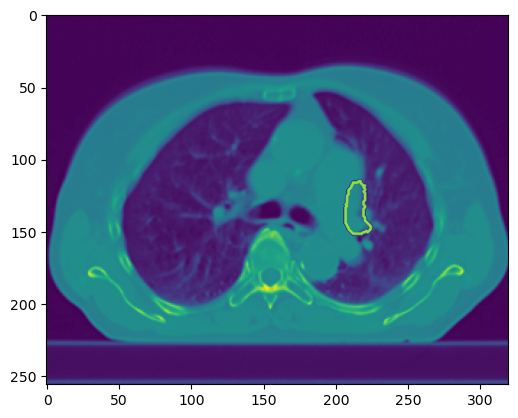

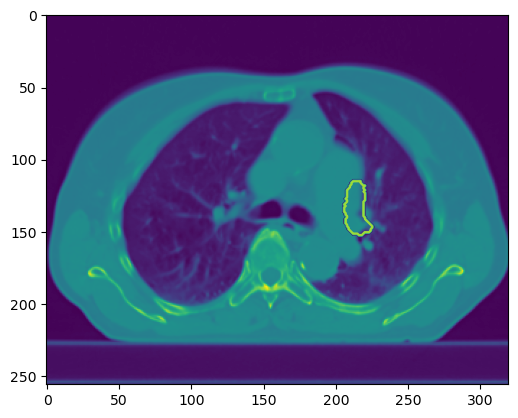

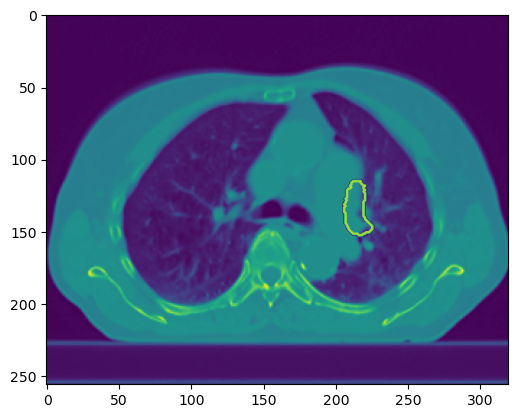

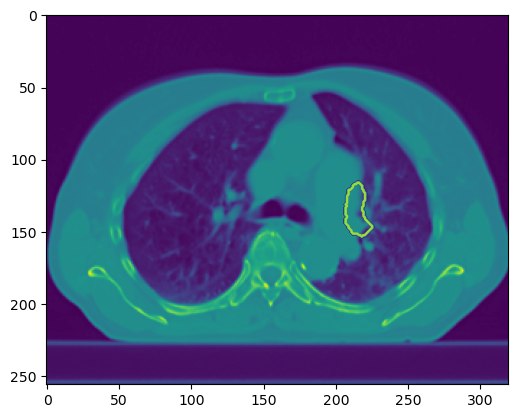

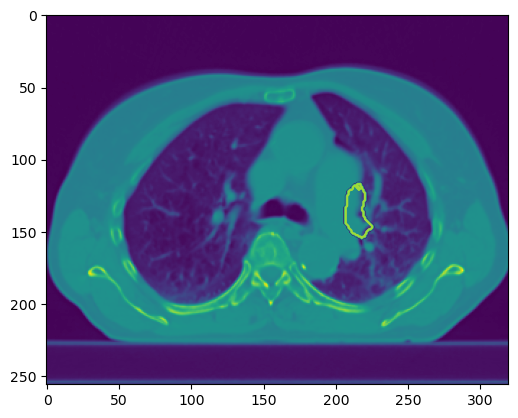

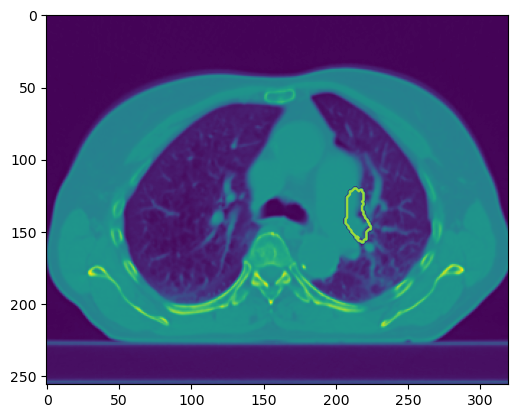

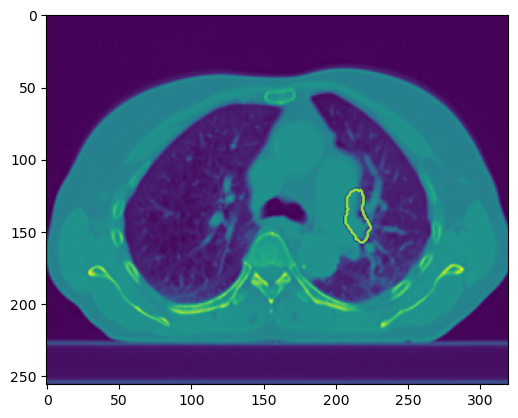

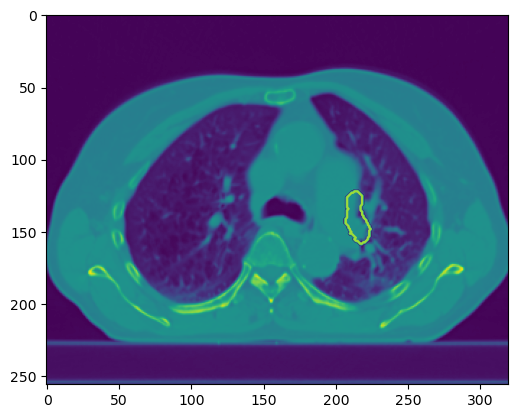

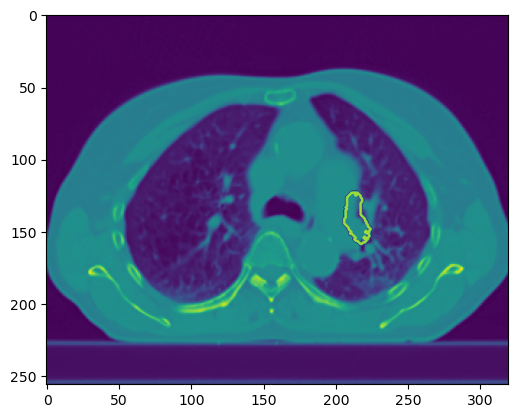

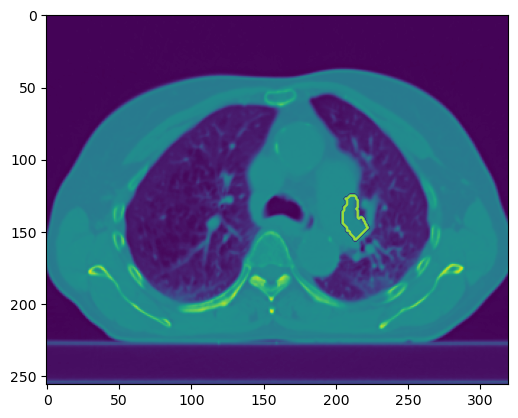

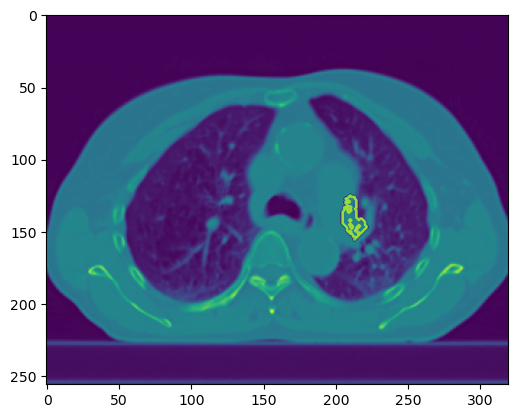

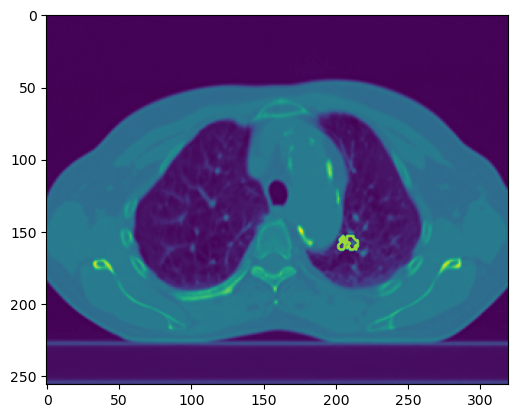

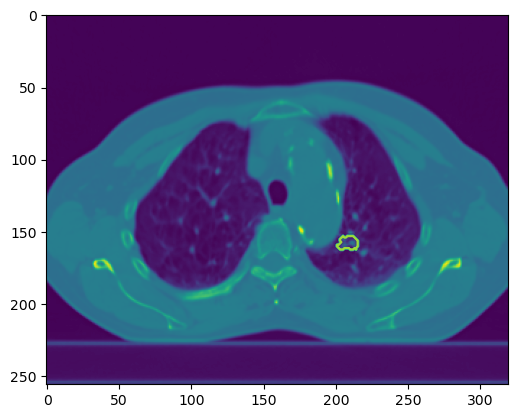

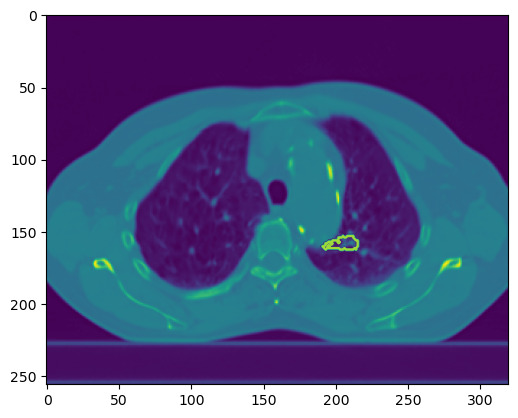

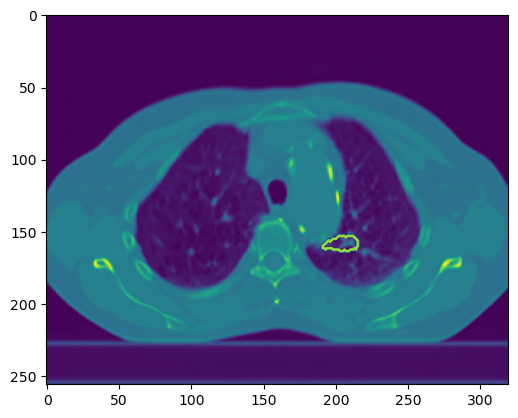

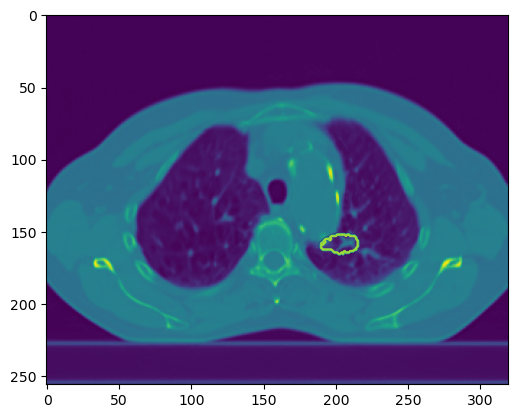

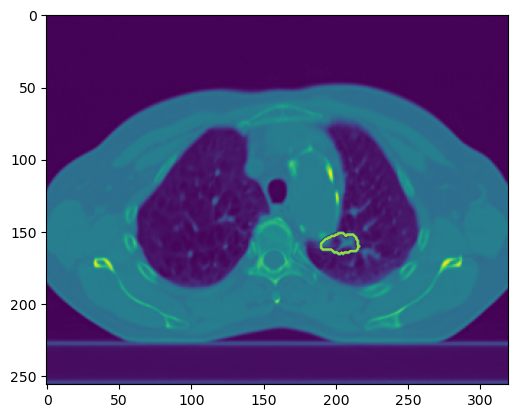

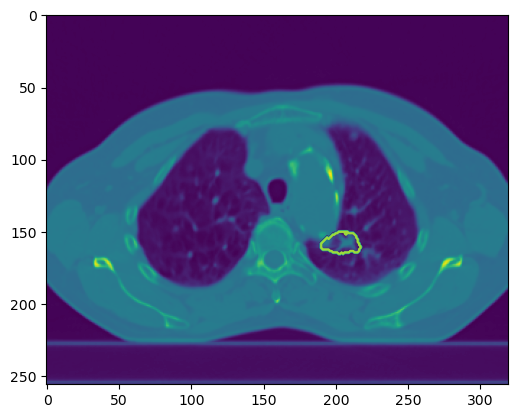

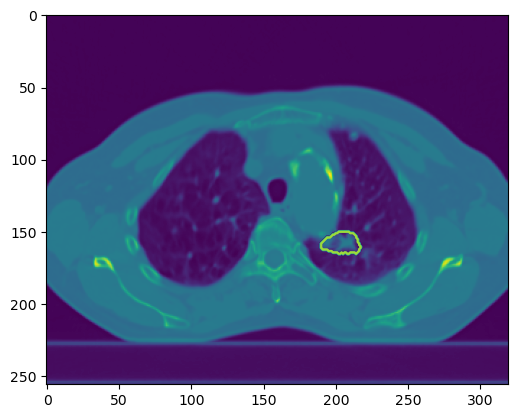

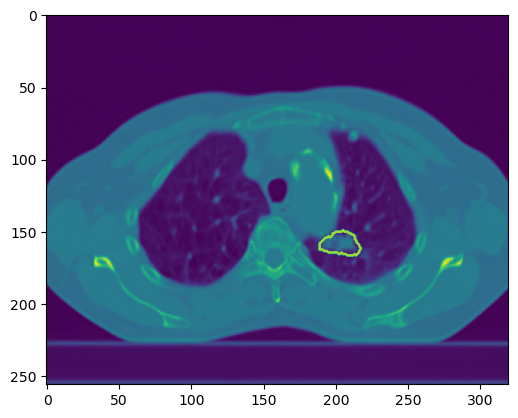

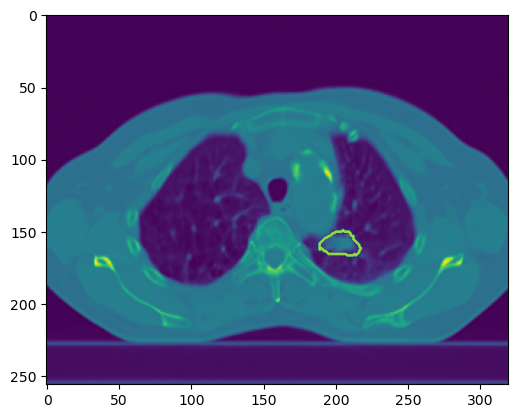

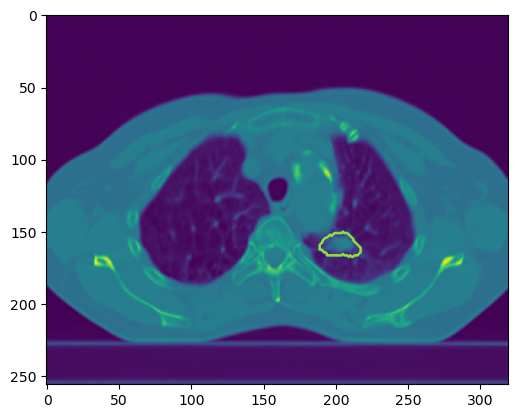

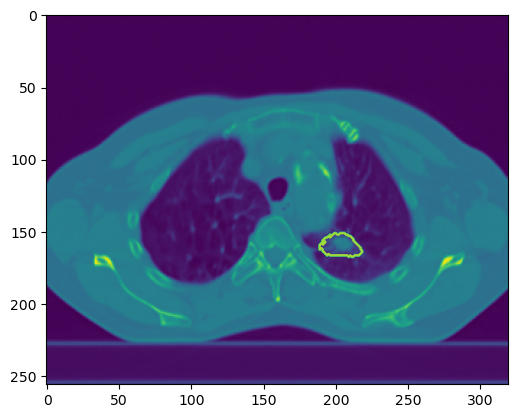

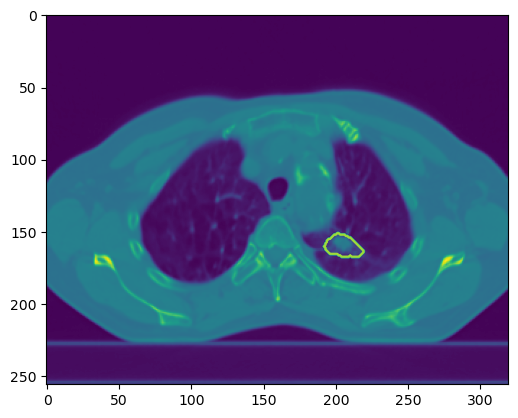

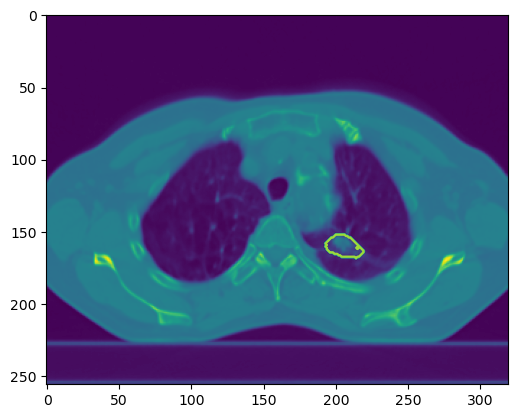

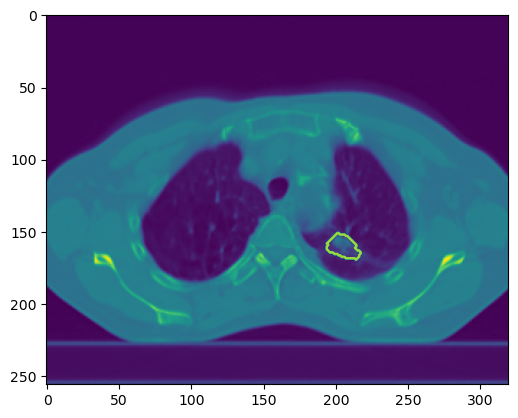

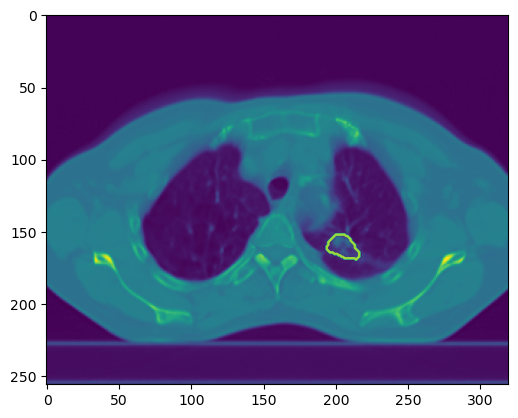

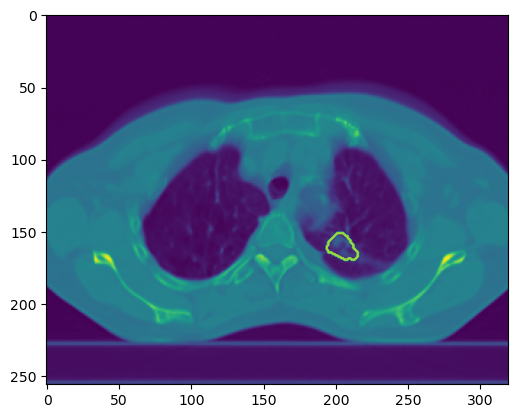

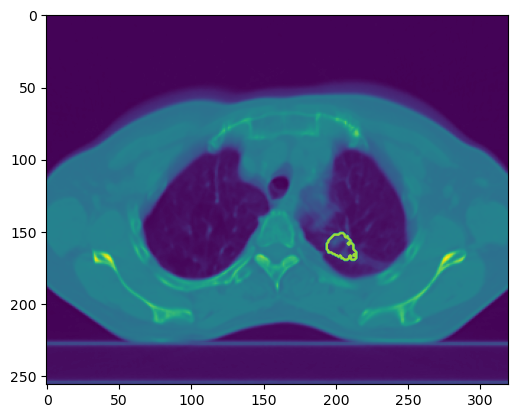

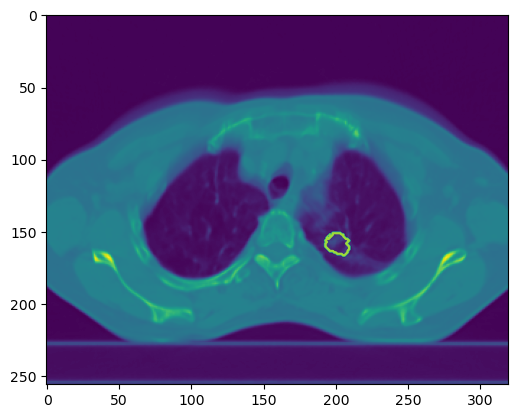

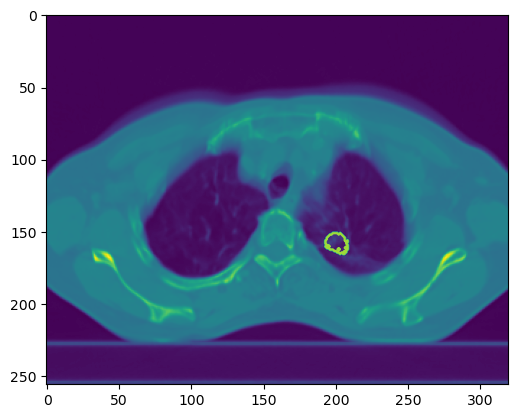

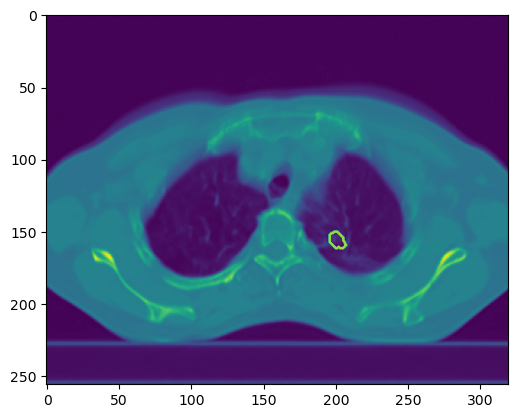

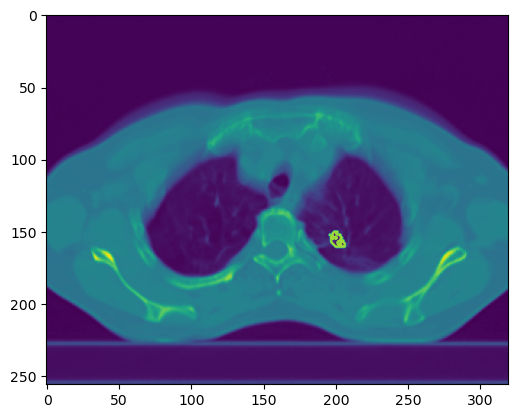

In [41]:
for i in range(0,256,1):
    if np.sum(itv_filled[:,:,i])>0:
        plt.imshow(ct_np[:,:,i])
        plt.contour(itv_filled[:,:,i])
        #plt.contour(lung_filled[:,:,i])
        plt.show()